# 분산분석 모듈화

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *

from pandas import melt

## #02. 피어슨 상관분석 (연속형 변수의 경우)

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/mtcars.xlsx", index_col='name', info=False)
my_pretty_table(origin.head())

+-------------------+-------+-------+--------+------+--------+-------+--------+------+------+--------+--------+
| name              |   mpg |   cyl |   disp |   hp |   drat |    wt |   qsec |   vs |   am |   gear |   carb |
|-------------------+-------+-------+--------+------+--------+-------+--------+------+------+--------+--------|
| Mazda RX4         |    21 |     6 |    160 |  110 |    3.9 |  2.62 |  16.46 |    0 |    1 |      4 |      4 |
| Mazda RX4 Wag     |    21 |     6 |    160 |  110 |    3.9 | 2.875 |  17.02 |    0 |    1 |      4 |      4 |
| Datsun 710        |  22.8 |     4 |    108 |   93 |   3.85 |  2.32 |  18.61 |    1 |    1 |      4 |      1 |
| Hornet 4 Drive    |  21.4 |     6 |    258 |  110 |   3.08 | 3.215 |  19.44 |    1 |    0 |      3 |      1 |
| Hornet Sportabout |  18.7 |     8 |    360 |  175 |   3.15 |  3.44 |  17.02 |    0 |    0 |      3 |      2 |
+-------------------+-------+-------+--------+------+--------+-------+--------+------+------+--------+--

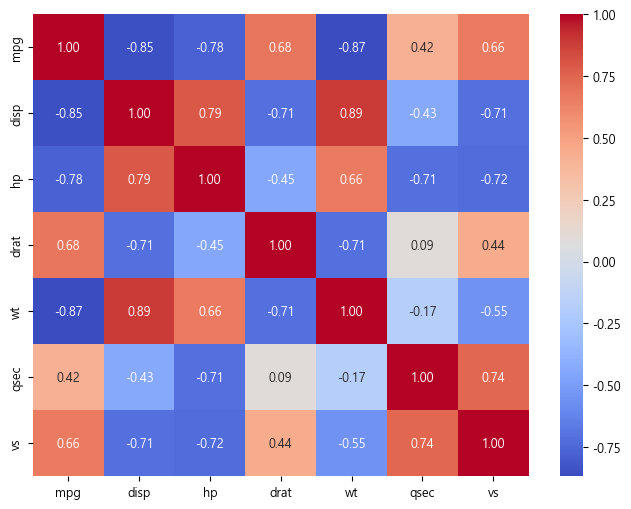

+------------------+---------------+-------------+----------+
|                  |   correlation |     p-value | result   |
|------------------+---------------+-------------+----------|
| ('mpg', 'disp')  |     -0.847551 | 9.38033e-10 | True     |
| ('mpg', 'hp')    |     -0.776168 | 1.78784e-07 | True     |
| ('mpg', 'drat')  |      0.681172 | 1.77624e-05 | True     |
| ('mpg', 'wt')    |     -0.867659 | 1.29396e-10 | True     |
| ('mpg', 'qsec')  |      0.418684 |    0.017082 | True     |
| ('mpg', 'vs')    |      0.664039 | 3.41594e-05 | True     |
| ('disp', 'mpg')  |     -0.847551 | 9.38033e-10 | True     |
| ('disp', 'hp')   |      0.790949 | 7.14268e-08 | True     |
| ('disp', 'drat') |     -0.710214 | 5.28202e-06 | True     |
| ('disp', 'wt')   |       0.88798 | 1.22232e-11 | True     |
| ('disp', 'qsec') |     -0.433698 |    0.013144 | True     |
| ('disp', 'vs')   |     -0.710416 | 5.23501e-06 | True     |
| ('hp', 'mpg')    |     -0.776168 | 1.78784e-07 | True     |
| ('hp',

In [3]:
df1 = origin[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs']]

my_correlation(df1, method='p', heatmap=True, dpi=100, figsize=(8, 6))

## #03. 스피어만 상관분석 (명목형,서열척도의 경우)

In [ ]:
df2 = origin[['cyl', 'vs', 'am', 'gear', 'carb']]

my_correlation(df2, method='s', heatmap=True, dpi=100, figsize=(8, 6))

## #04. 번외

In [4]:
from pandas import DataFrame

In [5]:
df = DataFrame({
    'class': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

df

,class,values
0,A,1
1,A,2
2,A,3
3,A,4
4,A,5
5,B,6
6,B,7
7,B,8
8,B,9
9,B,10


In [6]:
my_unmelt(df, id_vars='class', value_vars='values')

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10
